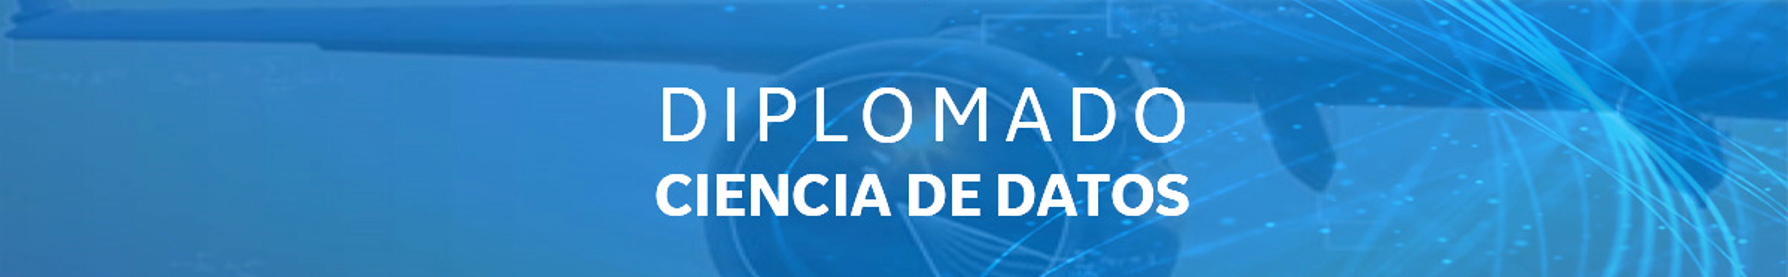

***
## Instrucciones
* Lee con cuidado todas las celdas y córrelas.
* Completa el código o responde las preguntas en las celdas dónde se indica.
* Al finalizar de completar y correr todo el notebook guárdalo y súbelo a la tarea. (.ipynb o .pdf)
* Te recomendamos hacer modificaciones al código y pruebas para que conozcas mejor la sintaxis

# Intervalos de confianza

Supongamos que vivimos en una ciudad con 100,000 habitantes y habrá elecciones. Debemos predecir quién va a ganar la elección, el partido azúl o el amarillo. No tenemos tiempo ni recursos para entrevistar a todos los habitantes así que entrevistamos a 100 personal aleatoriamente. Al final de la encuesta encontramos que el 62% de las personas votarán amarillo.

¿Con esta información podemos decir que amarillo ganará con una probabilidad del 62% o que 62% de la población votará por amarillo? La respuesta es que **no**.

No sabemos qué tan lejos o cerca está realmente nuestra estimación (62%) de la verdad en la población entera. Entonces, lo que haremos en lugar será encontrar un rango de valores al rededor de la estadística que encontramos (62%) que capturen con cierta probabilidad el valor de la población completa. 

Recordemos que el teorema de límite central nos dice que al tomar muestras de una población y calcular una estadística como la media, las medias estarán distribuidas como una distribución normal.

Entonces algo que sí sabemos es que el 62% que obtuvimos de entrevistar a las 100 personas estará en algún lado de esa distribución normal cuya media será el valor real de la población completa. Nuestro estimado puede estar en cualquier lugar de la distribución normal.

Vamos a hacer un ejemplo de calcular los intervalos de confianza. Lee con atención y ejecuta el siguiente código.

In [1]:
# importar las librerías necesarias
# en caso de faltar alguna instalar con !pip install <nombre de la librería>

%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns

Obtengamos una población aleatoria con la función `poisson.rvs` de la librería [scipy](https://docs.scipy.org/doc/scipy/reference/stats.html). Concatenaremos las dos distribuciones de poisson con distintos parámetros para formar nuestra población. 

43.002372

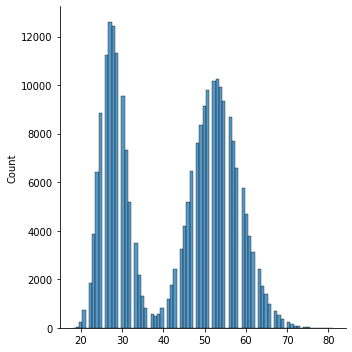

In [2]:
# fijamos una semilla para obtener resultados reproducibles
np.random.seed(10)
# obtenemos una población a partir de una distribución de poisson
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
# obtenemos una población a partir de una distribución de poisson
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
# concatenamos las dos para formar nuestra población.
population_ages = np.concatenate((population_ages1, population_ages2))
# grafiquemos la población
sns.displot(population_ages)

population_ages.mean()

Como podemos ver en la gráfica nuestra población está formada por dos grupos de personas. La media de la población completa es de 43.

Ahora obtengamos una muestra a partír de la población. Pensemos que estamos haciendo una encuesta y entrevistamos a 1,000 personas.

In [3]:
# muestra de 500 valores
sample_ages = np.random.choice(a= population_ages, size=500)
# obtener la media
print(sample_ages.mean())
# diferencia entre la media poblacional y la media muestral
population_ages.mean() - sample_ages.mean()   

43.012


-0.009627999999999304

La diferencia entre la media de la población y la muestra está cerca pero es distinto. Podemos tener un estimado bastante cercano de una población completa si es que seleccionamos una muestra aleatoria suficientemente grande.

Ahora supongamos que conocemos 

Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

Calcular una estadística sobre una muestra nos da una buena idea de la población completa pero puede tener errores y muchas veces no es posible tomar muchas muestras o suficientes muestras para tener mejores estimados. Un intervalo de confianza nos ayuda a definir un valor arriba y abajo a una estimación puntual que capture el parámetro verdadero de la población completa. 

Lo que hacemos para calcular los intervalos de confianza es tomar el estimado puntual (media de la muestra por ejemplo) y sumando y restando el margen de error para crear un rango. El margen de error se relaciona directamente con el nivel de confianza que deseamos, la variación en nuestros datos y el tamaño d ela muestra. 

Si conocemos la desviación estándar de la población el margen de error se calcula: $$z∗\frac{\sigma}{\sqrt{n}}$$ donde $\sigma$ es la desviación estándar de la población, $n$ es el tamaño de la muestra y $z$ es un número que se conoce como el [valor crítico](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/tests-of-means/what-is-a-z-value/). El valor crítico o valor Z corresponde al número de desviaciones estándar que tendríamos que recorrer a partír de la media de la distribución normal para capturar los datos asociados a un determinado nivel de confianza. Por ejemplo, sabemos que aproximadamente 95% de los datos en una distribución normal están [contenidos en 2 desviaciones estándar de la media](https://es.wikipedia.org/wiki/Regla_68-95-99.7), así que podríamos usar 2 como el valor crítico para un intervalo de confianza de 95% aproximadamente.

Existe una función de **scipy** que nos permite obtener el valor crítico de una manera mas precisa. [`stats.norm.ppf()`](https://stackoverflow.com/a/61556552).


Calculemos un intervalo de confianza del 95% para nuestra media.

In [4]:
# primero fijamos una semilla aleatoria para 
# que los resultados sean siempre los mismos
np.random.seed(10)

# Tomemos una muestra de 500
sample_size = 500
sample = np.random.choice(a=population_ages, size=sample_size)

# calculemos la media
sample_mean = sample.mean()
print("Media de la muestra: ", sample_mean)

Media de la muestra:  42.378


In [5]:
# calculemos el valor crítico de Z
# queremos el 95% de confianza, usamos q=0.975 porque la distribución tiene dos colas
# 0.25 a la derecha y 0.25 a la izquierda. Por eso el parámetro
z_critical = stats.norm.ppf(q = 0.975)
print("Valor crítico:", z_critical)

Valor crítico: 1.959963984540054


In [6]:
# Obtengamos la desviación estándar de la población
# este valor no siempre lo tendremos a la hora de calcular 
# intervalos de confianza pero por ahora supongamos que podemos
# acceder a él.

pop_stdev = population_ages.std()
pop_stdev

13.229146547438953

Ya tenemos el valor crítico que nos interesa $Z$, la desviación estandar de la población $\sigma$ y el tamaño de la muestra así que podemos calcular el margen de error  $$z∗\frac{\sigma}{\sqrt{n}}$$

In [7]:
# calculamos el margen de error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
print("Margen de error: ", margin_of_error)

Margen de error:  1.1595645141421105


Con el margen de error podemos calcular los intervalos de confianza:

In [8]:
# intervalo superior
sup = sample_mean + margin_of_error
inf = sample_mean - margin_of_error

print("Media poblacional: ", population_ages.mean())
print("Media muestral: ", sample_mean)
print("Intervalos de confianza:")
print("Inferior: ", inf)
print("Superior: ", sup)

Media poblacional:  43.002372
Media muestral:  42.378
Intervalos de confianza:
Inferior:  41.21843548585789
Superior:  43.53756451414211


En la grafica mostramos
* El histograma de la población en azúl
* La media poblacional en rojo
* La media muestral en negro
* Los intervalos de confianza en amarillo

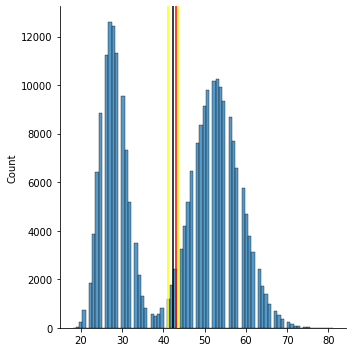

In [9]:
# Grafiquemos 
ax = sns.displot(population_ages);
plt.axvline(population_ages.mean(), color='red', ls='-');
plt.axvline(sample_mean, color='black', ls='-');
plt.axvline(inf, color='yellow', ls='-');
plt.axvline(sup, color='yellow', ls='-');


Notemos que en efecto la media poblacional está contenida en los intervalos de confianza.

---
# Ejercicio 1
El dataframe `mpg_data` tiene información sobre rendimiento de gasolina de distintos automóviles. En este caso nos enfocaremos solamente en la columna `hwy` que tiene el valor de rendimiento de combustible en millas por galón de los automóviles. 
La variable `rendimiento` tiene solamente estos valores. Sigue los pasos anteriores con los datos de rendimiento.

1. Obtén la media poblacional de la columna de rendimiento y guárdala en una variable. Lo puedes hacer con numpy utilizando `np.mean(...)` o pandas `rendimiento.mean()`.
2. Obtén una muestra del 25% de las observaciones de rendimiento. Puedes usar `np.random.choice` como lo hicimos anteriormente. [documentación de np.random.choice].(https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)
3. Obtén los intervalos con un 90% de confianza para la estimación de la media en la muestra. 
4. Crea una gráfica

In [10]:
mpg_data = pd.read_csv("https://github.com/sidsriv/Introduction-to-Data-Science-in-python/raw/master/mpg.csv", index_col=0)
rendimiento = mpg_data['hwy']

Media: 23.44017094017094; Desviación estándar: 5.9546434411664455


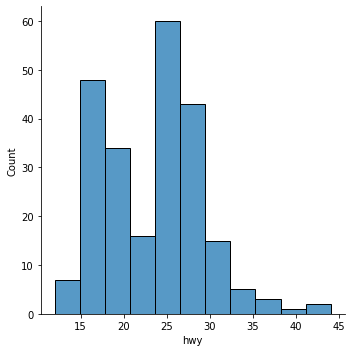

In [11]:
sns.displot(rendimiento)
rmean = rendimiento.mean()
rstd = rendimiento.std()
print(f"Media: {rmean}; Desviación estándar: {rstd}")

In [12]:
# Código aquí
np.random.seed(10)
sample_size = int(len(rendimiento) * 0.25)
rsamp = np.random.choice(a=rendimiento, size=sample_size)
z_critical = stats.norm.ppf(q=0.975)
margin_of_error = z_critical * (rstd / math.sqrt(sample_size))
sample_mean = rsamp.mean()
ubound = sample_mean + margin_of_error
lbound = sample_mean - margin_of_error

print(f"Tamaño de la población: {len(rendimiento)}; Tamaño de la muestra: {sample_size}")
print(f"Media de la población: {rmean}; Media de la muestra: {sample_mean}")
print(f"Desviación estándar de la población: {rstd}; Desviación estandar de la muestra: {rsamp.std()}")
print()
print(f"Valor crítico (Z): {z_critical}")
print(f"Margen de error: {margin_of_error}")
print(f"Límite inferior: {lbound}; límite superior: {ubound}")

Tamaño de la población: 234; Tamaño de la muestra: 58
Media de la población: 23.44017094017094; Media de la muestra: 22.379310344827587
Desviación estándar de la población: 5.9546434411664455; Desviación estandar de la muestra: 6.397272010751783

Valor crítico (Z): 1.959963984540054
Margen de error: 1.5324624989782936
Límite inferior: 20.846847845849293; límite superior: 23.91177284380588


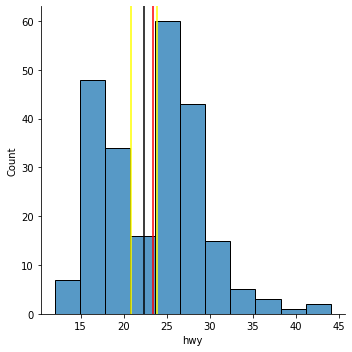

In [13]:
ax = sns.displot(rendimiento);
plt.axvline(rmean, color='red', ls='-');
plt.axvline(sample_mean, color='black', ls='-');
plt.axvline(lbound, color='yellow', ls='-');
plt.axvline(ubound, color='yellow', ls='-');

---

Continuemos explorando los intervalos de confianza para ejemplificar mejor qué significa que los intervalos capturen la media. Haremos el proceso de obtener una muestra y unos intevalos de confianza 25 veces para graficar los intervalos.

In [14]:
# Definimos de nuevo la distribución de edades y guardamos la desviación estándar
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))
pop_stdev = population_ages.std()
pop_stdev

13.229146547438953

In [15]:
# Definimos el tamaño de la muestra
sample_size = 1000

# en estas listas vacías guardaremos las medias y
# los intervalos de las muestras.
intervals = []
sample_means = []

# Correremos 25 veces los siguientes pasos
for sample in range(25):
    # obtener muestra y media
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    # guardamos la media en la lista
    sample_means.append(sample_mean)
    # valor crítico 95% de confianza
    z_critical = stats.norm.ppf(q = 0.975)
    
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    # guardamos los intervalos
    intervals.append(confidence_interval)

In [16]:
# imprimir los primeros 3 intervalos y medias muestrales
print("Medias: ", sample_means[:3])
print("Intervalos: ", intervals[:3])


Medias:  [43.217, 42.489, 42.734]
Intervalos:  [(42.39706406882683, 44.03693593117317), (41.66906406882683, 43.30893593117317), (41.91406406882683, 43.55393593117317)]


Grafiquemos estos datos para visualizar todas las medias que realizamos y los intervalos.
Usaremos una función llamada [`errorbar`](https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html) de matplotlib para hacer una gráfica con los errores.


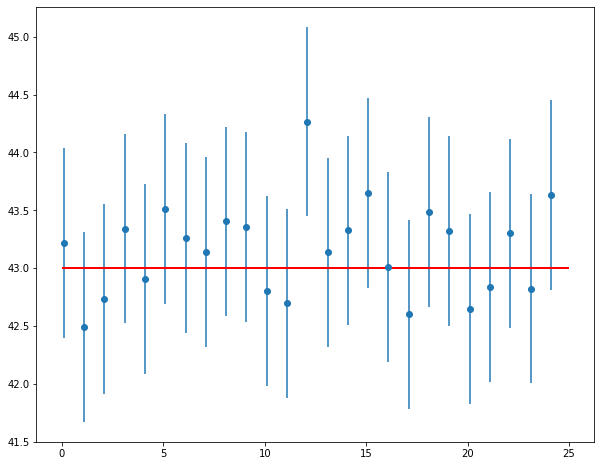

In [17]:
# Creamos una gráfica con estos datos
# establecemos el tamaño de la gráfica
plt.figure(figsize=(10,8))

# graficamos en los puntos las medias y los errores
plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

# graficamos una línea horizontal en el lugar de la media poblacional.
plt.hlines(xmin=0, xmax=25,
           y=population_ages.mean(),
           linewidth=2.0,
           color="red");

Notemos que en la gráfica de arriba todos los intervalos de confianza menos uno se traslapan con la línea roja que marca la media poblacional. Esto es esperado ya que un intervalo con confianza del 95% captura la media 95% de las veces. Esperaríamos que el intervalo no contenga la media 5% de las veces.


# Ejercicio adicional
Intenta corroborar que la media poblacional cae un 95% de las veces dentro del intervalo.
1. Crea una función para obtener una muestra de la población y calcular los intervalos para $n$ muestras. Puedes partír del `for ` que hicimos arriba donde calculamos esto 25 veces.
2. Calcula el porcentaje de veces que la media poblacional cae dentro de los intervalos de confianza.
3. Aumenta el tamaño de $n$ para verificar que el porcentaje de veces que la media poblacional se acerca a 95% 

In [18]:
def muestreo(pob, n_muestras, prop_muestra, q=0.975):
    '''
    Crea n muestras (n_muestras) de tamaño de cierta proporción de la
    población (prop_muestra) para una población (pob) y entrega un tuple
    con los intervalos de confianza.
    q puede definirse para el valor de z crítica (def 0.975)
    Regresa una lista de tuples con los límites inferiores y superiores
        intervalos = [(límite_inferior, límite_superior),...]
    y una lista con las medias de cada intervalo
    '''
    # TODO: validar argumentos válidos
    t_muestra = int(len(pob)*prop_muestra)
    z_crítica = stats.norm.ppf(q=q)
    intervalos = []
    medias = []
    for s in range(n_muestras):
        # obtener muestra y media
        muestra = np.random.choice(a=pob, size=t_muestra)
        media_muestra = muestra.mean()
        # agregamos la media a la lista
        medias.append(media_muestra)
        # valor crítico 95% de confianza
        margen_error = z_crítica * (pob.std()/math.sqrt(t_muestra))
        # guardamos los intervalos
        intervalos.append((media_muestra-margen_error, media_muestra+margen_error))
        
    return intervalos, medias

In [45]:
errs = []
count = 0
for i in range(10, 1001, 10):
    intervalos, medias = muestreo(rendimiento, i, 0.25)
    c = 0
    for i in intervalos:
        if rmean >= i[0] and rmean <= i[1]:
            c += 1
    errs.append(c / len(intervalos))
    if c/len(intervalos) >= 0.95:
        count += 1

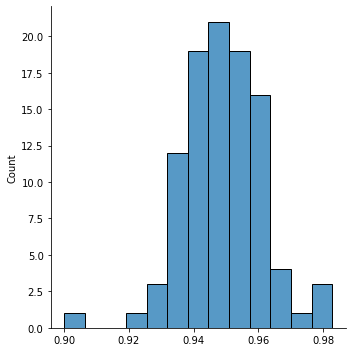

In [46]:
sns.displot(errs)

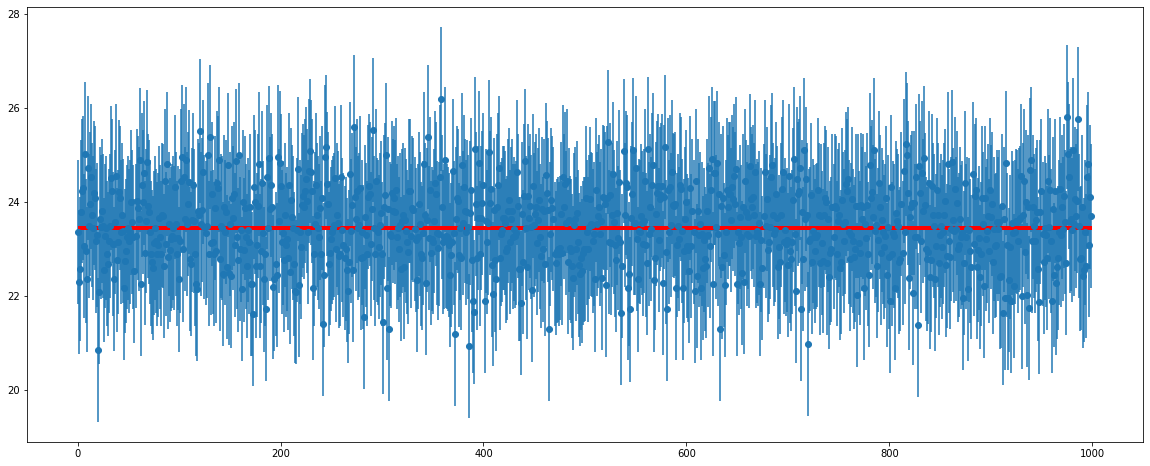

In [34]:
# Creamos una gráfica con estos datos
# establecemos el tamaño de la gráfica
plt.figure(figsize=(20,8))

# graficamos en los puntos las medias y los errores
plt.errorbar(x=np.arange(0, 1000, 1), 
             y=medias, 
             yerr=[(top-bot)/2 for top,bot in intervalos],
             fmt='o')

# graficamos una línea horizontal en el lugar de la media poblacional.
plt.hlines(xmin=0, xmax=1000,
           y=rmean,
           linewidth=4.0,
           color="red");